# Regularisation basics

## Prerequisites

- [Bias, variance and generalisation]()

## Learning objectives

- Understand what is meant by regularisation
- Understand and implement the regularisation techniques:
    - Early stopping
    - Lasso regression 
    - Ridge regression

## Intro - What is regularisation?

__Regularisation is any modiﬁcation we make to a learning algorithm that is intended to reduce its generalization error but not its training error__

Usually this involves constraining our model to make it harder to perfectly fit the training set through techniques such as:
- stopping training early
- adding penalty terms to the objective
- changing the model architecture to reduce it's capacity

Why would we want to do that? Doesn't such approach makes it harder for our model to learn? 

__Exactly__, and that is what we want to do, because:
- we reduce model's capacity and force it to learn simpler functions
- simpler functions __usually__ have to learn only the most important relations
- those relations are more likely influential for the whole data (including test), which helps in generalization (at the cost of higher training loss)

In this notebook we will implement some of those regularisation techniques.

## Early stopping

Early stopping is a technique in which you continue model training until you notice the generalisation error begin to increase (models start to overfit).

![](images/early_stopping.jpg)

Early stopping has a few parameters one can set, notably:
- `patience` - how long to wait (usually in amount of epochs) before terminating training. Sometimes validation loss may decrease after a few epochs
- `delta` - how much of a decrease constitutes an improvement over previous values. Small improvements (say `0.000001`) may not be worth computer resources.

### Ways to implement

- store __only__ the best model based on validation loss (or other metric), efficient in terms of disk usage and most popular
- store __all__ models which might be joined together. Usually does not bring big improvements over the best model, hence used way less in the community

## Introducing norm penalties



### Norms



To recap, the $L^p$ ("L-p") norm is given by:

$$
||x||_p = \sqrt[^p]{\Sigma_i|x_i|^p}
$$



### Norm penalties

L1 and L2 are the types of regularisation that we will learn and implement next. 
They both involve adding a term, which is a norm penalty, to the cost function.

Also they are special cases of LP normalization, other LP (e.g. L4) are almost never used in practice.

![](images/norm_penalty_loss.jpg)

> __lambda value__ describes strength of regularisation; the higher, the more effect it has on our model...

### The effect of norm penalties

> __Norm penalties increase as the model parameters get larger__

This in turn reduces model's tendency to depend on large values for features as the model tries to minimize our cost function.

- Smaller and less "spurious" weights make the model smoother and simpler. Also model is less likely to come up with functions which find patterns in data that aren't really there because doing so (by increasing weights in magnitude) would increase loss value.
- Regularising our objective function additionally helps to reduce variance in our final model.

## Lasso regression (L1 regularisation)

> Lasso regression = Linear Regression + L1 regularisation 

Lasso regularisation penalises the objective by adding a L1 norm. This term is proportional to the sum of the **absolute** parameter values.

$$
||x||_1 = \Sigma_i|x_i|
$$

![](images/lasso_loss.jpg)

The L1 regularisation penalty's contribution to the gradient of the loss with respect to the model parameters is constant. 

__The L1 regularisation term is not differentiable__. It is only piecewise-differentiable either side of 0. Fortunately it is not really a problem, as for `0` we will have `0` penalty.

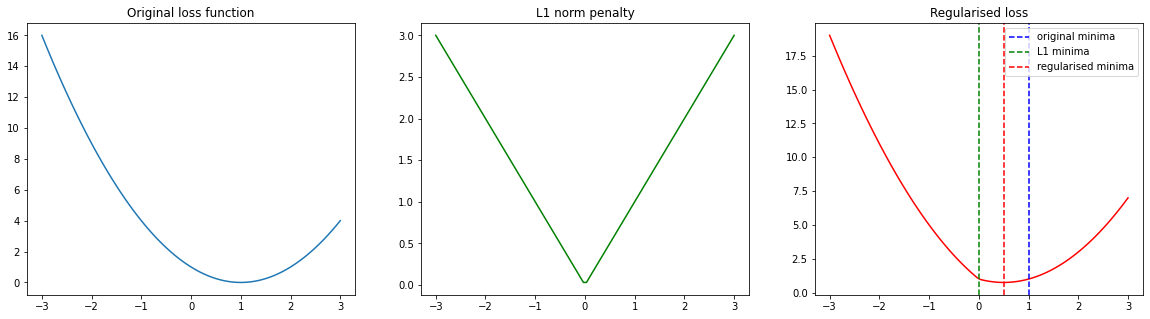

In [1]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2 # dummy loss function without weight decay regularisation

_lambda = 1
l1 = _lambda * np.abs(W)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l1, c='g')
ax2.set_title('L1 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l1, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L1 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

Above you can see minima of both the original loss function (on the left) and the regularisation term (middle). 

When you apply both onto each other it moves found minima of original function towards regularisation minimum (right).

## Ridge regression (L2 regularisation)

Ridge regression = linear regression + **squared** L2 regularisation 

As previously mentioned, the L2 norm is used so commonly in machine learning that it is often written with the norm subscript omitted.

$$
||x||_2 = ||x|| = \sqrt{\sum_i x_i^2}
$$

For computational simplicity, we use the squared $L^2$ norm as the penalty.

![](images/ridge_loss.jpg)

> `sqrt` is not necessary as it can be disregarded as some multiplying constant (`weight_decay` parameter) and controlled by hand

Ridge regression penalises the objective by adding a L2 norm. This term is proportional to the sum of the **square** parameter values. 

Notice that the L2 norm calculates the euclidian distance of a vector.

![title](images/NN1_regularization.JPG)

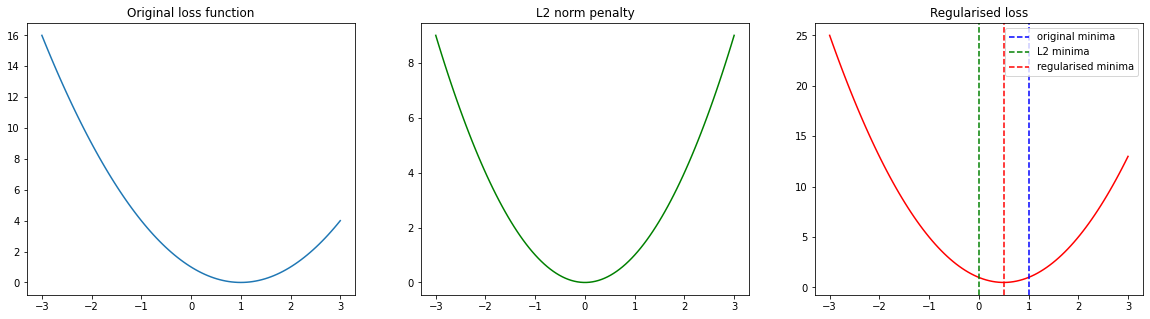

In [2]:
import numpy as np
import matplotlib.pyplot as plt

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 1
l2 = _lambda * W**2

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax1.plot(W, L)
ax1.set_title('Original loss function')
ax2 = fig.add_subplot(132)
ax2.plot(W, l2, c='g')
ax2.set_title('L2 norm penalty')
ax3 = fig.add_subplot(133)
ax3.plot(W, L + l2, c='r')
ax3.set_title('Regularised loss')

ax3.axvline(1, c='b', linestyle='--', label="original minima")
ax3.axvline(0, c='g', linestyle='--', label="L2 minima")
ax3.axvline(0.5, c='r', linestyle='--', label="regularised minima")
ax3.legend()

plt.show()

## L1 vs L2 intuition

L1 and L2 both regularize our model but they do so differently and we should choose one (or both) depending on our goal.

We should assume a few things for this thought experiment:

- Our model has __only__ two weights: $w_1$ and $w_2$.
- __Total value__ we __have to__ distribute between __both__ of those weights is `1` (so $w_1 + w_2 = 1$ always) and weights have to be positive
- Weights have to be positive
- Function our linear regression tries to approximate is simply:

$$
    y = x
$$

- Function we use for approximation with weights is (coefficent are fixed):

$$
    y = 1xw_1 + 0.99999xw_2
$$

__Notice that either of $w_1$, $w_2$ can approximate the function well on their own__

What $w_1$ and $w_2$ values should we set in order to minimise the cost?

### L1

For L1 we can set the value to anything between $[0, 1]$ as long as they sum to `1`.
So:

- $w_1=0$, $w_2=1$ - total is `1` and $|0| + |1| = 1$ is the penalty
- $w_1=0.5$, $w_2=0.5$ - total is `1` and $|0.5| + |0.5| = 1$ is the penalty
- $w_1=1$, $w_2=0$ - total is `1` and $|1| + |0| = 1$ is the penalty

No matter the value chosen, penalty will always be equal to `1`. __This leaves us with the cost itself__. Let's input those values into equation and see what we get:

- $w_1=0$, $w_2=1$ - $y = 1x0 + 0.99999x1 = 0.99999x$ - a little off from $y=x$, loss will be $0.00001$
- $w_1=0.5$, $w_2=0.5$ - $y = 1x0.5 + 0.99999x0.5 = 0.999995x$ - a little off from $y=x$, loss will be $0.000005$, notice it is twice smaller than the loss above
- $w_1=1$, $w_2=0$ - $y = 1x1 + 0.99999x0 = x$ - perfect loss is 0!

#### Conclusions

What the above gives us?
- No matter the magnitude penalty is the same (wait for L2 to fully get it)
- __L1 regularization chooses the most important weight__ - here $w_1$ perfectly matches so $w_2$ is not needed at all
- __It enforces sparsity__ - weights which are not needed are __prunned__
- Should be chosen for models where we seek to explain phenomenons a little easier. In our case we can say only $w_1$ is important and $w_2$ can be disregarded

Sometimes weights might not be zeroed out perfectly so we should remove them if they are below some predefined threshold.

#### L2

Let's do the same task for L2:

- $w_1=0$, $w_2=1$ - total is `1` and $|0| + |1| = 1$ is the penalty
- $w_1=0.5$, $w_2=0.5$ - total __isn't__ `1` (finally, huh?) as $0.5^2 + 0.5^2 = 0.25$
- $w_1=1$, $w_2=0$ - total is `1` and $|1| + |0| = 1$ is the penalty

In L2 smaller values in magnitude have less impact on the regularization term. Cost for L2 stays the same __BUT__ this time $w_1=1$ and $w_2=0$ won't be chosen because of regularization penalty. For our values respectively:

- penalty + loss - $1 + 0.00001 = 1.00001$ total cost
- __penalty + loss - $0.5 + 0.000005 = 0.500005$ total cost__
- penalty + loss - $1 + 0.0 = 1.0$ total cost

In this case values minimizing whole cost are __evenly split__.

#### Conclusions

- __Magnitude plays most important role__ - the smaller the values the better
- __Responsibility split__ - if both weights do the same (or almost the same) they should have non-zero magnitude
- __Smoother__ - loss function is smoother instead of sharp jumps with prunned values like before
- Bad for explaining phenomenons. Possibly unneeded factors are still left around and influence the result.

L2 is also the more popular variant (especially in neural networks) and sometimes called __weight decay__.

## How cost function changes

Below you can see a visualization how loss landscape changes when we add L2 regularization term (and the aforemenetioned smoothness).

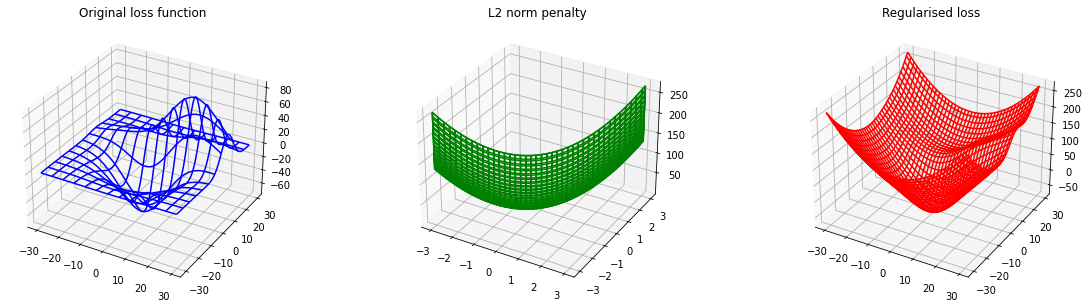

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

W = np.linspace(-3, 3, num=100)
L = (W-1)**2

_lambda = 15
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
xx, yy = np.meshgrid(x, y)
l2 = _lambda * (xx**2 + yy**2)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131, projection='3d')
# ax1.plot(W, L)
ax1.set_title('Original loss function')
X, Y, Z = axes3d.get_test_data(0.05)
ax1.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color='b')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title('L2 norm penalty')

ax2.plot_wireframe(x, y, l2, color='g')

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_wireframe(X, Y, Z + l2, color='r')
ax3.set_title('Regularised loss')

plt.show()

- The graphs highlight how regularisation can reduce variance by making optima closer to the origin preferable to other minimas (even the global one).

- We can see in the red graph how regularisation guides the parameterisation toward the global optima and makes the function smoother. Hence it doesn't matter when we start our optimization, with regularization it is more likely we will reach a reasonable minimum

## Mean squared error and L2

Now that we know how `L2` works, let's combine our cost function and `L2` regularization into single formula:

$$
\begin{equation}
    L_{regularized} = L_{mse} + \lambda\sum_{i=1}^n w_i^2
\end{equation}
$$

$$
\begin{equation}
    \frac
        {
            \partial
            L_{regularized} 
        }
        {
            \partial
            w 
        }
        = 
    \frac
        {
            \partial
            L_{mse} 
        }
        {
            \partial
            w 
        }
    + 2\lambda\sum_{i=1}^n w_i
\end{equation}
$$


## Mean squared error and L1

Let's do similar thing for L1:

$$
\begin{equation}
    L_{regularized} = L_{mse} + \lambda\sum_{i=1}^n |w_i|
\end{equation}
$$

$$
\begin{equation}
    \frac
        {
            \partial
            L_{regularized} 
        }
        {
            \partial
            w 
        }
        = 
    \frac
        {
            \partial
            L_{mse} 
        }
        {
            \partial
            w 
        }
    + \lambda\sum_{i=1}^n sign(w_i)
\end{equation}
$$

## Assessments

- Understand what is [Elastic Net Regression](https://en.wikipedia.org/wiki/Elastic_net_regularization) and why it works, what advantages it has and what might be the disadvantages
- Use `sklearn`'s Lasso and Ridge versions, check out how they work, what are their parameters
- Play around with `L1` & `L2` regularization for `BinaryLogisticRegression` in the cells above (different datasets (easier, harder), different decay factors, higher/lower level of polynomial). What are your observations?
- Find the best polynomial level for this task using `K-Fold`
- Modify `LinearRegression` from previous exercises to use early stopping.